Programming (40 points):

Use decision tree and random forest to train the titanic.csv dataset included in the assignment.

Step 1: Read in Titanic.csv and observe a few samples, some features are categorical, and others are numerical. If some features are missing, fill them in using the average of the same feature of other samples. Take a random 80% samples for training and the rest 20% for test.

Step 2: Fit a decision tree model using independent variables 'pclass + sex + age + sibsp' and dependent variable 'survived'. Plot the full tree. Make sure 'survived' is a qualitative variable taking 1 (yes) or 0 (no) in your code. You may see a tree similar to this one (the actual structure and size of your tree can be different):

Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree. Plot the pruned tree which shall be smaller than the tree you obtained in Step 2.

Step 4: For the pruned tree, report its accuracy on the test set for the following:

    percent survivors correctly predicted (on test set)
    percent fatalities correctly predicted (on test set)

Step 5: Use the RandomForestClassifier() function to train a random forest using the value of max_leaf_nodes you found in Step 3. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following:

    percent survivors correctly predicted (on test set)
    percent fatalities correctly predicted (on test set)

Check whether there is improvement as compared to a single tree obtained in Step 4.

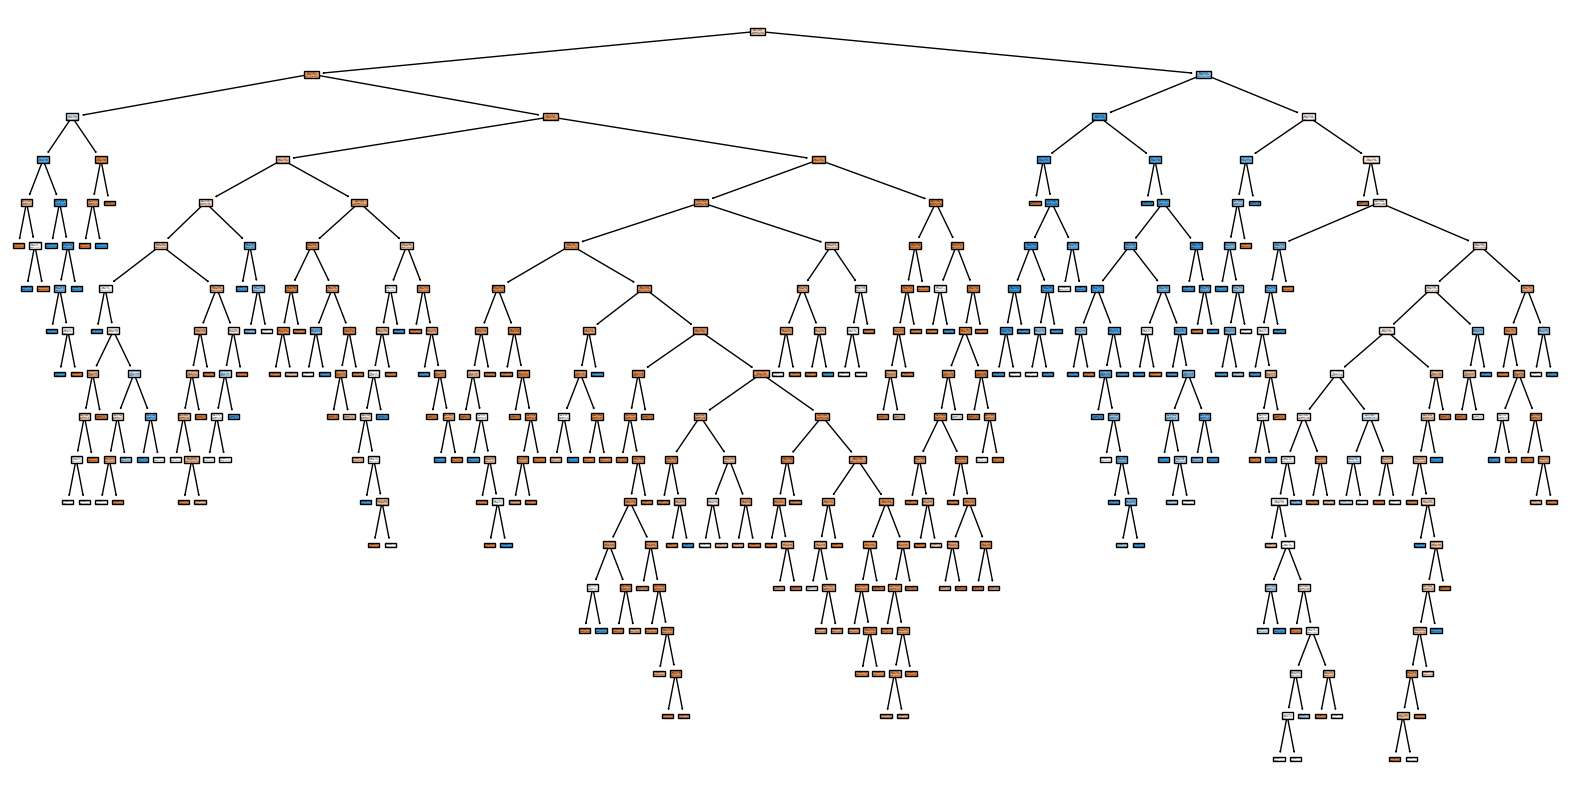

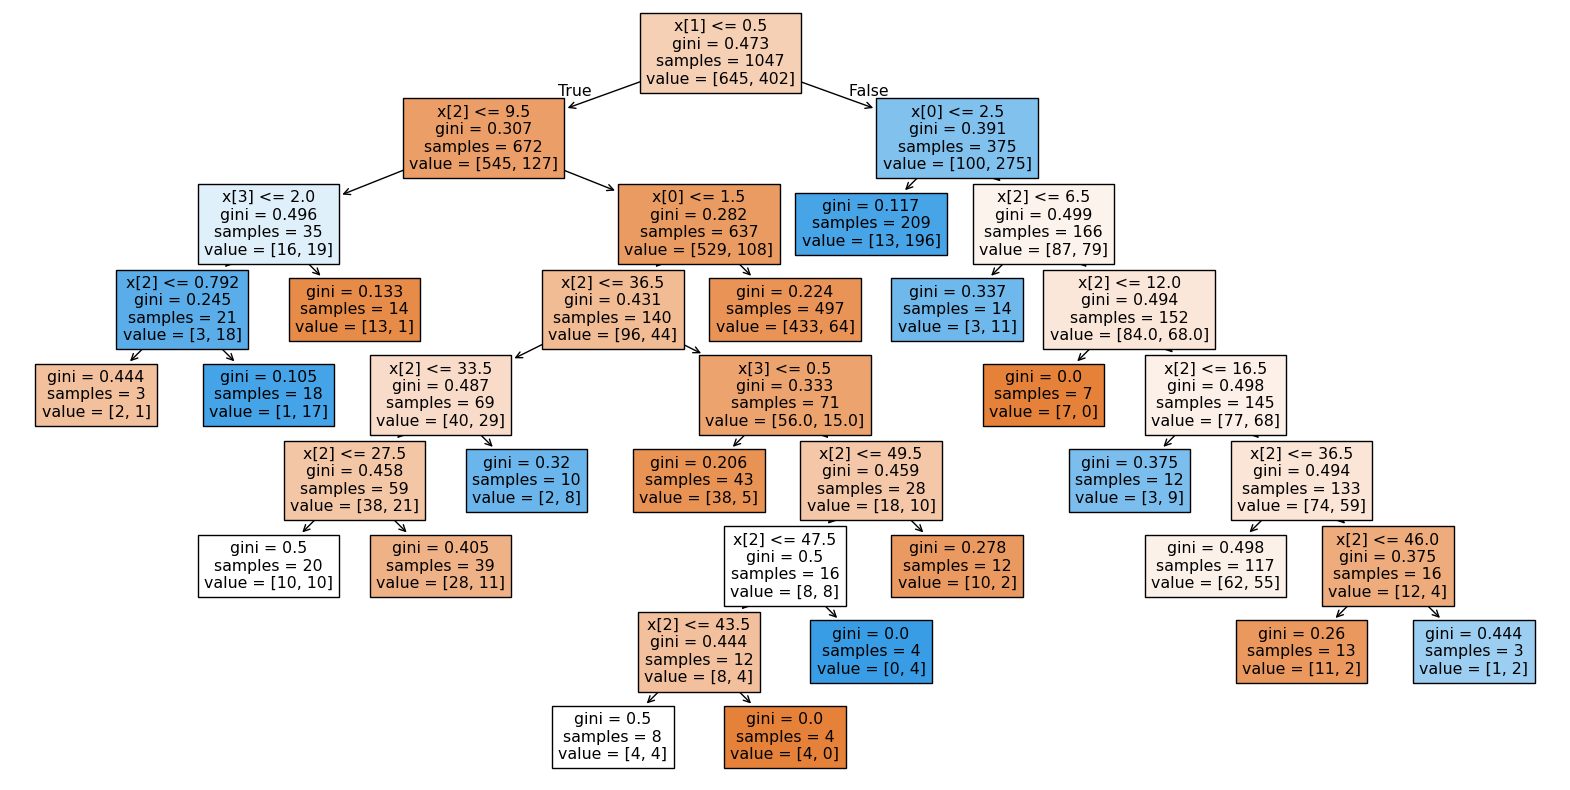

The max leaf nodes are:  19
The accuracy score for survivors is:  44.89795918367347 percent.
The accuracy score for fatalities is:  92.6829268292683 percent.
The accuracy score for survivors using a random forest is:  55.10204081632652 percent.
The accuracy score for fatalities using a random forest is:  92.6829268292683 percent.
The random forest is 10.20408163265305 percent more accurate than the decision tree at predicting survivors.
The random forest tree is 0.0 percent more accurate than the decision tree at predicting fatalities.


In [42]:
import sklearn.ensemble
import sklearn.tree
import numpy as npy;
import sklearn;
import matplotlib.pyplot as plt;
import csv;
import random;

#Step 1: Read in the data and separate into test and training data.
data = []
file = open('Titanic.csv', newline='')
reader = csv.reader(file, delimiter=',')
i = 0
for row in reader:
    if i > 0:
        row[1] = row[1][:-2]
        if row[4] == 'male':
            row[4] = 0
        else:
            row[4] = 1
        data.append(row)
    i = i + 1
average = 0
ages = 0
for row in data:
    if row[5] != "NA":
        row[5] = float(row[5])
        average = average + row[5]
        ages = ages + 1
average = average / ages
for row in data:
    if row[5] == "NA":
        row[5] = average
total = len(data)
trainSize = int(total * 0.8)
random.shuffle(data)
train = data[:trainSize]
test = data[trainSize:]

# Step 2: Fit a decision tree model using independent variables 'pclass + sex + age + sibsp' and dependent variable 'survived'. 
# Then plot the full tree.
trainX = []
trainY = []
testX = []
testY = []
for row in train:
    trainX.append([int(row[1]), row[4], row[5], int(row[6])])
    trainY.append(int(row[2]))
for row in test:
    testX.append([int(row[1]), row[4], row[5], int(row[6])])
    testY.append(int(row[2]))
treeClassifier = sklearn.tree.DecisionTreeClassifier()
treeClassifier.fit(trainX, trainY)
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(treeClassifier, filled=True)
plt.show()

#Step 3: Use the GridSearchCV() function to find the best parameter max_leaf_nodes to prune the tree and then plot said tree.
grid = {'max_leaf_nodes': range(2, 100)}
search = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(random_state = 0), grid, cv = 5, return_train_score = True)
search.fit(trainX, trainY)
tree = search.best_estimator_
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(tree, filled=True)
plt.show()
leaves = tree.max_leaf_nodes
print("The max leaf nodes are: ", leaves)

# Step 4: For the pruned tree, report its accuracy on the test set for the following:
# percent fatalities accurately reported (for the test set)
# percent survivors accurately reported (for the test set)
predicted = tree.predict(testX)
nums = 0
accurate = 0
survivors = 0
deceased = 0
for (i, j) in zip(testY, predicted):
    if (i == 1):
        nums = nums + 1
        if (j == 1):
            accurate = accurate + 1
if (nums != 0):
    survivors = accurate / nums
    survivors = survivors * 100
nums = 0
accurate = 0
for (i, j) in zip(testY, predicted):
    if (i == 0):
        nums = nums + 1
        if (j == 0):
            accurate = accurate + 1
if (nums != 0):
    deceased = accurate / nums
    deceased = deceased * 100
print("The accuracy score for survivors is: ", survivors, "percent.")
print("The accuracy score for fatalities is: ", deceased, "percent.")

# Step 5: Use a random forest to report the accuracy for the following:
# percent fatalities accurately reported (for the test set)
# percent survivors accurately reported (for the test set)
forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 50, max_leaf_nodes = leaves)
forest.fit(trainX, trainY)
forestPredicted = forest.predict(testX)
nums = 0
accurate = 0
fSurvivors = 0
fDeceased = 0
for (i, j) in zip(testY, forestPredicted):
    if (i == 1):
        nums = nums + 1
        if (j == 1):
            accurate = accurate + 1
if (nums != 0):
    fSurvivors = accurate / nums
    fSurvivors = fSurvivors * 100
nums = 0
accurate = 0
for (i, j) in zip(testY, predicted):
    if (i == 0):
        nums = nums + 1
        if (j == 0):
            accurate = accurate + 1
if (nums != 0):
    fDeceased = accurate / nums
    fDeceased = fDeceased * 100
print("The accuracy score for survivors using a random forest is: ", fSurvivors, "percent.")
print("The accuracy score for fatalities using a random forest is: ", fDeceased, "percent.")
if (survivors > fSurvivors):
    sDifference = survivors - fSurvivors
    print("The random forest is", sDifference, "percent less accurate than the decision tree at predicting survivors.")
else:
    sDifference = fSurvivors - survivors
    print("The random forest is", sDifference, "percent more accurate than the decision tree at predicting survivors.")
if (deceased > fDeceased):
    dDifference = deceased - fDeceased
    print("The random forest is", dDifference, "percent less accurate than the decision tree at predicting fatalities.")
else:
    dDifference = fDeceased - deceased
    print("The random forest tree is", dDifference, "percent more accurate than the decision tree at predicting fatalities.")
